In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from credentials.config import viz_output_path

In [2]:
df = pd.read_csv('../data/meta_scrape.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        64 non-null     object 
 1   year        64 non-null     int64  
 2   week_num    64 non-null     int64  
 3   album       64 non-null     object 
 4   artist      64 non-null     object 
 5   meta_score  64 non-null     int64  
 6   user_score  64 non-null     int64  
 7   crit_num    60 non-null     float64
 8   user_num    64 non-null     int64  
 9   label       60 non-null     object 
 10  genre       64 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.6+ KB


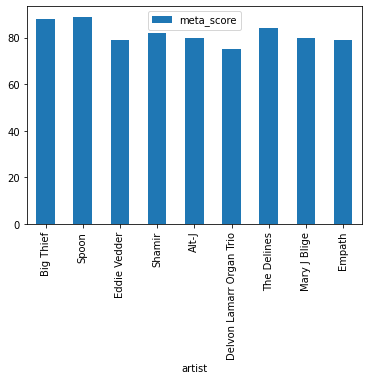

In [3]:
df_for_week = df.loc[df['week_num']==6]
df_for_week.head()
ax = df_for_week.plot.bar(x='artist', y='meta_score', rot=90)

In [4]:
# seprete rows with nulls from df 
df_nulls = df[df.isnull().any(axis=1)]
df_clean = df.dropna(inplace=False)

In [5]:
# clean genre lists
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 63
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        60 non-null     object 
 1   year        60 non-null     int64  
 2   week_num    60 non-null     int64  
 3   album       60 non-null     object 
 4   artist      60 non-null     object 
 5   meta_score  60 non-null     int64  
 6   user_score  60 non-null     int64  
 7   crit_num    60 non-null     float64
 8   user_num    60 non-null     int64  
 9   label       60 non-null     object 
 10  genre       60 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.6+ KB


In [6]:
# bin by scores

bins = [0, 69, 79, 89, 100]
group_names=['mixed', '70s', '80s', '90s']
df["score_groups"] = pd.cut(df["meta_score"], bins, labels=group_names, include_lowest=True)
df.tail()

,date,year,week_num,album,artist,meta_score,user_score,crit_num,user_num,label,genre,score_groups
59,"January 21, 2022",2022,3,Strictly a One-Eyed Jack,John Mellencamp,70,0,5.0,0,Republic,"['Rap', 'Pop/Rock', 'Contemporary Singer/Songw...",70s
60,"January 21, 2022",2022,3,Ghost Stories,The Whitmore Sisters,81,0,5.0,0,Red House Records,"['Country', 'Folk', 'Americana', 'Pop/Rock', '...",80s
61,"January 21, 2022",2022,3,The Runner Original Soundtrack,Boy Harsher,75,0,7.0,0,Nude Club,['Electronic'],70s
62,"January 21, 2022",2022,3,Good and Green Again,Jake Xerxes Fussell,87,0,5.0,0,Paradise of Bachelors,"['Folk', 'Blues', 'Alternative/Indie Rock', 'N...",80s
63,"January 20, 2022",2022,3,Havasu,Pedro the Lion,69,0,5.0,0,Polyvinyl,"['Pop/Rock', 'Alternative/Indie Rock', 'Indie ...",mixed


In [7]:
# seprete rows with nulls from df 
df_nulls = df[df.isnull().any(axis=1)]
df_clean = df.dropna(inplace=False)

<Figure size 7200x2880 with 0 Axes>

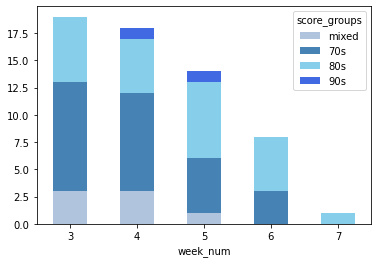

<Figure size 432x288 with 0 Axes>

In [8]:
# stacked bar chart-multi-indexed on weeknum and score groups

df_by_week_bin = df_clean.groupby(['week_num', 'score_groups']).count().fillna(0)
plt.figure(figsize = (100,40))
df_by_week_bin['album'].unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'steelblue','skyblue','royalblue'])
plt.xticks(rotation=360)
plt.show()
plt.savefig(viz_output_path + '\\scrape_stacked_score.png')

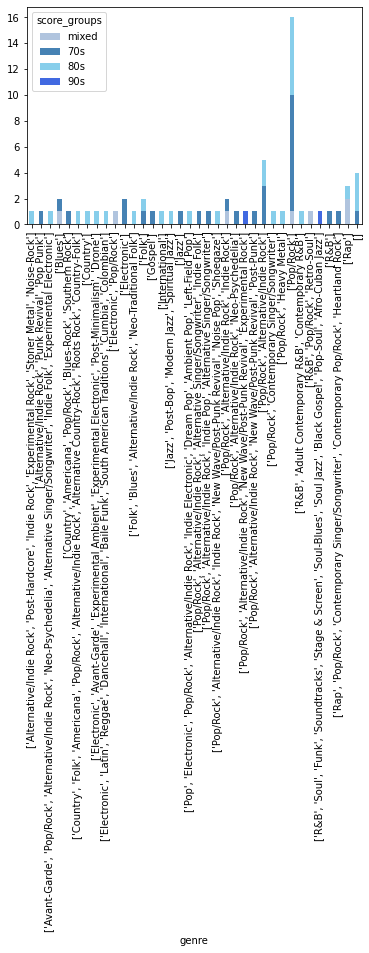

In [9]:
# need a plan for genre, tricky subject, possibly mongo?

df_by_genre_bin = df.groupby(['genre', 'score_groups']).count().fillna(0)

df_by_genre_bin['album'].unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'steelblue','skyblue','royalblue'])
plt.xticks(rotation=90)
plt.savefig(viz_output_path + '\\scrape_stacked_genre.png')

In [10]:
# labels with more than one entery
label_2plus = df['label'].value_counts().loc[lambda x : x>1]
label_2plus

Interscope    2
Republic      2
City Slang    2
Name: label, dtype: int64

In [11]:
# create df for labels with more than one entry
grouped_label = df.groupby('label')
multi_album_label = grouped_label.filter(lambda x: x['score_groups'].nunique() > 1.)
multi_album_label

,date,year,week_num,album,artist,meta_score,user_score,crit_num,user_num,label,genre,score_groups
10,"February 4, 2022",2022,5,Let the Festivities Begin!,Los Bitchos,74,0,7.0,0,City Slang,"['Pop/Rock', 'Alternative/Indie Rock']",70s
37,"January 28, 2022",2022,4,Aboogi,Imarhan,86,0,4.0,0,City Slang,['International'],80s


<Figure size 28800x5760 with 0 Axes>

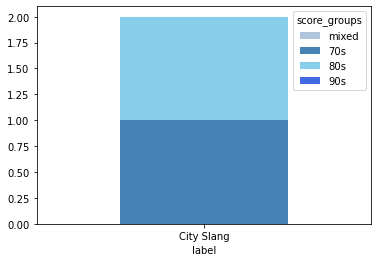

<Figure size 432x288 with 0 Axes>

In [12]:
# stacked chart for binned ratings by label with more than one album
df_label_bin = multi_album_label.groupby(['label', 'score_groups']).count()
df_label_bin
plt.figure(figsize = (400, 80))
df_label_bin['album'].unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'steelblue','skyblue','royalblue'])
plt.xticks(rotation=360)
plt.show()
plt.savefig(viz_output_path + '\\label_stacked_score.png')

In [13]:
# sorting df by number of critic reviews and selecting the top 30
df_clean
num_reviews_df = df_clean.sort_values(by=['crit_num'], ascending=False)
top_30_reviews_df = num_reviews_df.head(30)
top_30_reviews_df

,date,year,week_num,album,artist,meta_score,user_score,crit_num,user_num,label,genre,score_groups
18,"February 4, 2022",2022,5,Laurel Hell,Mitski,83,88,26.0,41,Dead Oceans,['Pop/Rock'],80s
17,"February 4, 2022",2022,5,Time Skiffs,Animal Collective,76,88,24.0,21,Domino,['Pop/Rock'],70s
1,"February 11, 2022",2022,6,Dragon New Warm Mountain I Believe in You,Big Thief,88,94,22.0,14,4AD,['Pop/Rock'],80s
19,"February 4, 2022",2022,5,Ants From Up There,Black Country New Road,92,95,20.0,87,Ninja Tune,"['Pop/Rock', 'Alternative/Indie Rock', 'New Wa...",90s
20,"February 4, 2022",2022,5,Pompeii,Cate Le Bon,85,88,19.0,8,Mexican Summer,['Pop/Rock'],80s
2,"February 11, 2022",2022,6,Lucifer on the Sofa,Spoon,89,98,16.0,12,Matador,['Pop/Rock'],80s
49,"January 21, 2022",2022,3,Night Call,Years Years,71,78,13.0,19,Interscope,['Pop/Rock'],70s
26,"January 28, 2022",2022,4,Extreme Witchcraft,Eels,72,82,13.0,5,E Works,"['Pop/Rock', 'Alternative/Indie Rock']",70s
3,"February 11, 2022",2022,6,Earthling,Eddie Vedder,79,0,12.0,0,Republic,['Pop/Rock'],70s
34,"January 28, 2022",2022,4,Motordrome,M,68,85,10.0,18,Sony,"['Electronic', 'Pop/Rock']",mixed


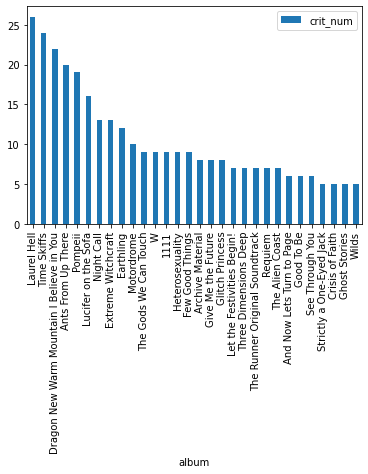

In [14]:
# top 30 albums by count of critic reviews
ax = top_30_reviews_df.plot.bar(x='album', y='crit_num', rot=90)

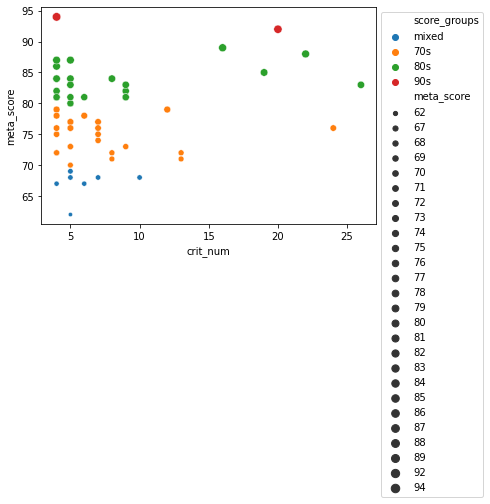

In [15]:
sns.scatterplot(data=df_clean, x="crit_num", y="meta_score", size="meta_score", hue="score_groups", legend="full")
plt.legend(loc =2, bbox_to_anchor = (1,1))

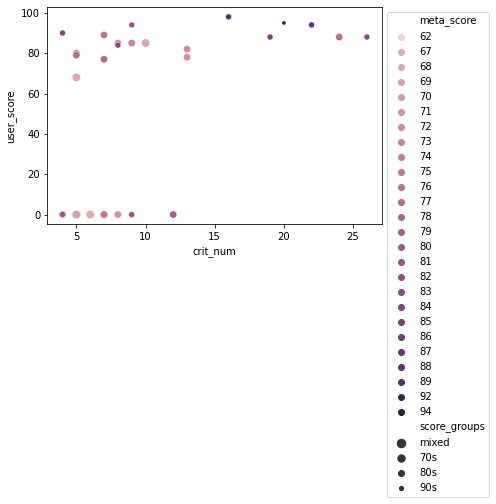

In [16]:
sns.scatterplot(data=df_clean, x="crit_num", y="user_score", size="score_groups", hue="meta_score", legend="full")
plt.legend(loc =2, bbox_to_anchor = (1,1))

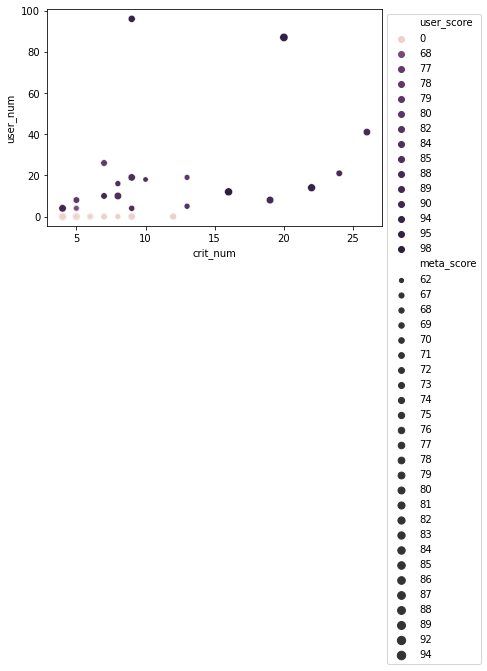

In [17]:
sns.scatterplot(data=df_clean, x="crit_num", y="user_num", size="meta_score", hue="user_score", legend="full")
plt.legend(loc =2, bbox_to_anchor = (1,1))

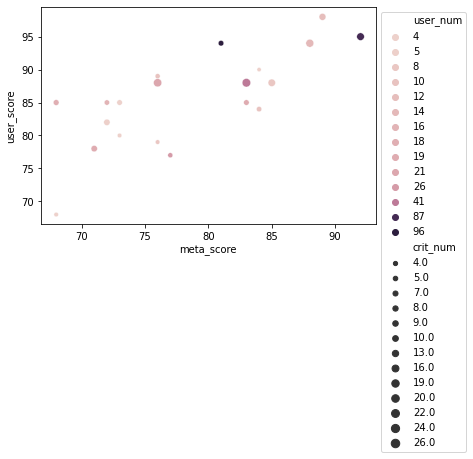

In [18]:
df_user_scores = df_clean.loc[df_clean['user_score'] !=0]
df_user_scores
sns.scatterplot(data=df_user_scores, x="meta_score", y="user_score", size="crit_num", hue="user_num", legend="full")
plt.legend(loc =2, bbox_to_anchor = (1,1))

In [28]:
import os
import csv
import numpy as np



week_num = 6
print(week_num)
scrape_dict = {
        'scores_lst': [],
        'album_lst': [],
        'artist_lst': [],
        'num_review_lst': []
}
file_path = os.path.join('..', 'data', 'meta_scrape.csv')
with open(file_path) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        if int(row['week_num']) == week_num:
            scrape_dict['scores_lst'].append(row['meta_score'])
            scrape_dict['album_lst'].append(row['album'])
            scrape_dict['artist_lst'].append(row['artist'])
            scrape_dict['num_review_lst'].append(row['crit_num'])



6


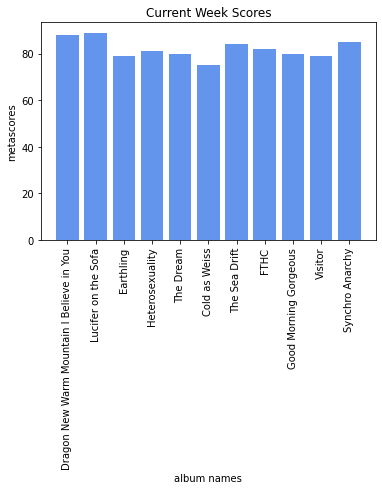

In [29]:

scores = [float(x) for x in scrape_dict['scores_lst']]

albums = scrape_dict['album_lst']



plt.bar(albums, scores, color='cornflowerblue')

plt.xticks(rotation = 90)

plt.xlabel('album names')
plt.ylabel('metascores')
plt.title('Current Week Scores')
plt.show()


# plt.bar(x_position, scrape_dict['scores'], color = 'cornflowerblue')


# plt.xticks(x_position, scrape_dict['albumlst'], rotation='vertical')
# plt.ylim((0,100))
# plt.show()

In [37]:
scrape_dict['num_review_lst']

['24', '16', '12', '10', '', '4', '4', '4', '', '4', '5']

In [35]:
x = np.array(scrape_dict['scores_lst'])
y = np.array([float(x) for x in scrape_dict['num_review_lst']])
# colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])

plt.scatter(x, y, cmap='viridis')

plt.colorbar()

plt.show()

ValueError: could not convert string to float: ''